# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [26]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Your Code Here

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [17]:

fitbit = pd.read_csv("../data/Fitbit2.csv")

In [18]:
fitbit.head(3)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5


In [19]:
# NOTA; Renombro columnas eliminando mayúsculas y espacios.
fitbit_copy = fitbit.copy()

In [20]:
columnas = list(fitbit_copy.keys())

In [21]:
diccio_nuevas = {columna: columna.replace(" ", "_").lower() for columna in columnas}

In [22]:
fitbit_renombrado = fitbit.rename(columns=diccio_nuevas)

In [23]:
fitbit_renombrado.sample()

,date,calorie_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,...,distance_miles,days,days_encoded,work_or_weekend,hours_sleep,sleep_efficiency,yesterday_sleep,yesterday_sleep_efficiency,months,months_encoded
158,2015-10-13,2698,7015,5.21,10,1.244,130,37,29,1036,...,3.237343,Tuesday,1.0,1,0.0,0.0,6.45,95.792079,October,10


In [24]:
fitbit.rename(columns=diccio_nuevas, inplace=True)

In [29]:
pd.isnull(fitbit).sum()

date                          0
calorie_burned                0
steps                         0
distance                      0
floors                        0
minutes_sedentary             0
minutes_lightly_active        0
minutes_fairly_active         0
minutes_very_active           0
activity_calories             0
minutesofsleep                0
minutesofbeingawake           0
numberofawakings              0
lengthofrestinminutes         0
distance_miles                0
days                          0
days_encoded                  0
work_or_weekend               0
hours_sleep                   0
sleep_efficiency              0
yesterday_sleep               0
yesterday_sleep_efficiency    0
months                        0
months_encoded                0
dtype: int64

In [30]:
pd.isna(fitbit).sum()

date                          0
calorie_burned                0
steps                         0
distance                      0
floors                        0
minutes_sedentary             0
minutes_lightly_active        0
minutes_fairly_active         0
minutes_very_active           0
activity_calories             0
minutesofsleep                0
minutesofbeingawake           0
numberofawakings              0
lengthofrestinminutes         0
distance_miles                0
days                          0
days_encoded                  0
work_or_weekend               0
hours_sleep                   0
sleep_efficiency              0
yesterday_sleep               0
yesterday_sleep_efficiency    0
months                        0
months_encoded                0
dtype: int64

In [33]:
fitbit.shape

(367, 24)

In [35]:
fitbit.sample(3)

,date,calorie_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,...,distance_miles,days,days_encoded,work_or_weekend,hours_sleep,sleep_efficiency,yesterday_sleep,yesterday_sleep_efficiency,months,months_encoded
278,2016-02-09,2872,10457,7.82,14,847.0,181,15,41,1252,...,4.859121,Tuesday,1.0,1,5.700000,89.295039,6.266667,88.262911,February,2
241,2016-01-04,3116,10366,7.70,16,650.0,235,53,30,159,...,4.784557,Monday,0.0,1,7.466667,88.537549,4.033333,96.031746,January,1
133,2015-09-18,2978,1262,9.38,9,773.0,170,59,39,1419,...,5.828460,Friday,4.0,1,6.900000,86.250000,8.750000,87.064677,September,9


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [41]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,4.)})
sns.set_style("whitegrid")

In [72]:
# AVERAGE STEPS BY MONTH_ENCODED

ave_stp_m_e = fitbit.groupby("months_encoded").agg({"steps": "median"})


In [73]:
ave_stp_m_e.sample()

,steps
months_encoded,
1,10366.0


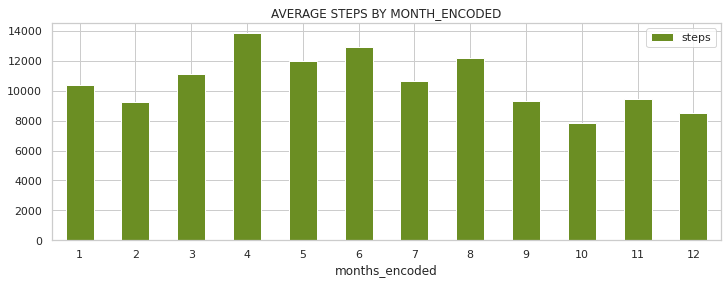

In [74]:
moths_encoded_fig = ave_stp_m_e.plot(kind="bar", title="AVERAGE STEPS BY MONTH_ENCODED", color = "olivedrab")
plt.xticks(rotation=0);

In [75]:
moths_encoded_fig.figure.savefig("../data/figures/moths_encoded_fig.jpg", dpi=1000)

In [77]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here
ave_stp_w_w = fitbit.groupby("work_or_weekend").agg({"steps": "mean"})

In [78]:
ave_stp_w_w

,steps
work_or_weekend,
0,10064.238095
1,10144.572519


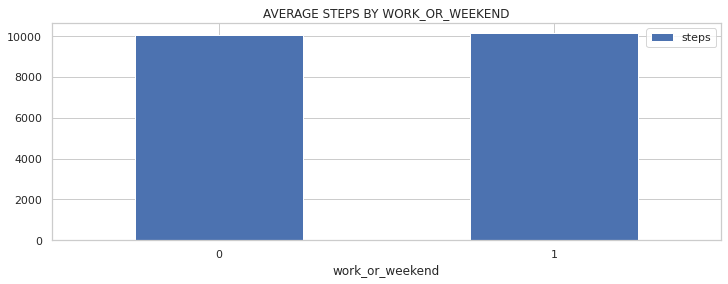

In [80]:
work_weekend_fig = ave_stp_w_w.plot(kind="bar", title="AVERAGE STEPS BY WORK_OR_WEEKEND")
plt.xticks(rotation=0);

In [81]:
work_weekend_fig.figure.savefig("../data/figures/work_weekend_fig.jpg", dpi=1000)

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [ ]:
# your code here

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [ ]:
# your code here

#### Explore the titanic dataset using Pandas dtypes.

In [ ]:
# your code here

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [ ]:
# NUMERICAL VARIABLES
# your code here

In [ ]:
# CATEGORICAL VARIABLES
# your code here

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [ ]:
# your code here

#### Use the right visulalization to show the distribution of column `Age`.

In [ ]:
# your code here

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

In [ ]:
# your code here

#### How does the bin size affect your plot?

In [ ]:
"""
your comments here
"""

#### Use seaborn to show the distribution of column `Age`.

In [ ]:
# your code here

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Use the right plot to visualize the column `Pclass`.

In [ ]:
# your code here

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

In [ ]:
# your code here

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

In [ ]:
# Method 1 - matplotlib
# your code here

In [ ]:
# Method 2 - seaborn
# your code here

#### Plot the correlation matrix using seaborn.

In [ ]:
# your code here

#### What are the most correlated features?

In [ ]:
"""
your comments here
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

In [ ]:
# your code here

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here